In [5]:
# %load RREF_real.py
from __future__ import division
import random as dom
from RREF_real import *
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()
import ipdb


testing the special plugin here
{{some_mtx}}

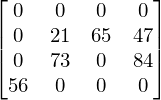

In [57]:
some_mtx = Matrix(4,4,[dom.randrange(1,100) if dom.randrange(1,5) >2 else 0
                       for i in range(16)])

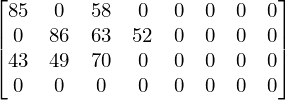

In [45]:
add_prac = some_mtx.copy()
add_prac.col_insert(add_prac.shape[1],zeros(4))

creating tool to solve equations to yield eigen Vectors

In [65]:
### need to write some code that can put together a column vector as a solution to the ax=b eqn
### setting
def calc_eig_val(mtx):
    grab_diag = lambda A: [A[i,i] for i in range(A.shape[0])]
    lambs = list(set(grab_diag(mtx))) 
    return lambs
    
def calc_eig_vec(mtx,eig_val):
    mtx = mtx-eye(mtx.shape[0])*eig_val
    aug_mtx = mtx.col_insert(mtx.shape[1],zeros(mtx.shape[0],1)) # all the shape business is just retrieving information that is stored about the actual object so this can scale
    reduced_aug = shortEF(aug_mtx)
    result = parameterize(aug_mtx)
    if not result: #meaning if parameterize is empty of result
        print('no eigen vectors for {} eigen value'.format(eig_val))
        return None
    return result

for turn in range(10):
    some_mtx = Matrix(4,4,[dom.randrange(1,100) if dom.randrange(1,5) >2 else 0
                           for i in range(16)])
    pprint(some_mtx)
    for val in calc_eig_val(some_mtx):
        print('evaluating ',val)
        pprint(calc_eig_vec(some_mtx,val))



    
    


⎡14  0   0  0 ⎤
⎢             ⎥
⎢48  0   0  0 ⎥
⎢             ⎥
⎢0   90  0  0 ⎥
⎢             ⎥
⎣39  0   0  40⎦
evaluating  0
⎡⎡0⎤, ⎡0 ⎤⎤
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢-1⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎣⎣0⎦  ⎣0 ⎦⎦
evaluating  40
⎡⎡0⎤⎤
⎢⎢ ⎥⎥
⎢⎢0⎥⎥
⎢⎢ ⎥⎥
⎢⎢0⎥⎥
⎢⎢ ⎥⎥
⎣⎣0⎦⎦
evaluating  14
⎡⎡-2/3 ⎤⎤
⎢⎢     ⎥⎥
⎢⎢-16/7⎥⎥
⎢⎢     ⎥⎥
⎢⎢-720 ⎥⎥
⎢⎢─────⎥⎥
⎢⎢  49 ⎥⎥
⎢⎢     ⎥⎥
⎣⎣  0  ⎦⎦
⎡84  0   0   2 ⎤
⎢              ⎥
⎢0   0   0   0 ⎥
⎢              ⎥
⎢0   46  0   73⎥
⎢              ⎥
⎣0   12  15  46⎦
evaluating  0
⎡⎡-1/42⎤⎤
⎢⎢     ⎥⎥
⎢⎢-73  ⎥⎥
⎢⎢──── ⎥⎥
⎢⎢ 46  ⎥⎥
⎢⎢     ⎥⎥
⎢⎢-124 ⎥⎥
⎢⎢─────⎥⎥
⎢⎢  69 ⎥⎥
⎢⎢     ⎥⎥
⎣⎣  0  ⎦⎦
evaluating  84
⎡⎡0⎤, ⎡-1⎤, ⎡0 ⎤, ⎡0 ⎤⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢-1⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢0 ⎥  ⎢0 ⎥  ⎢-1⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣0⎦  ⎣0 ⎦  ⎣0 ⎦  ⎣0 ⎦⎦
evaluating  46
no eigen vectors for 46 eigen value
None
⎡0   0  0   0 ⎤
⎢             ⎥
⎢86  0  48  0 ⎥
⎢             ⎥
⎢0   0  70  31⎥
⎢             ⎥
⎣0   0  90  11⎦
evaluating  0
⎡⎡0⎤, ⎡0 ⎤, ⎡0 ⎤⎤
⎢⎢

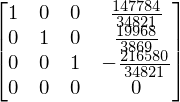

In [35]:
shortEF(some_mtx)

In [61]:
parameterize(some_mtx)

In [47]:
def parameterize(mtx):
    ret_list=[]
    for i in range(mtx.shape[0]):
        if mtx[i,i] != 1: #i here is just checking for presence of pivot positions
            if i != mtx.shape[0]:
                ret_list.append(-1*mtx[:,i])
            else:
                ret_list.append(mtx[:,i])
                
    return ret_list
